In [2]:
#all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OneHotEncoder
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
import json
from collections import defaultdict

from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from openai import OpenAI

best_k = 7 #change for different case

## Table for demographic/behavioral/psychological features

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 文件路径
file_path = 'Data\Data_SurveyPlusDemographics.txt'

# 读取文件
data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')

data = data.dropna()

# Display the remaining number of rows after dropping missing values
remaining_rows = data.shape[0]
print(f'Remaining number of rows after dropping missing values: {remaining_rows}')

# 显示数据的前几行
print(data.head())

Remaining number of rows after dropping missing values: 8120
   File  Row   Q1   Q2   Q3  Q4  FQ1  FQ2  FQ3  ComQ1  ...   D6  Dmed_7  \
0     1    1  5.0  5.0  4.0   5  3.0  1.0    3    1.0  ...  1.0    30.0   
1     1    2  4.0  4.0  4.0   4  3.0  1.0    3    2.0  ...  1.0    29.0   
2     1    3  5.0  5.0  4.0   4  3.0  1.0    3    1.0  ...  1.0    32.0   
3     1    4  5.0  5.0  4.0   4  3.0  4.0    3    1.0  ...  1.0    31.0   
4     1    5  5.0  5.0  5.0   5  3.0  1.0    3    1.0  ...  1.0    34.0   

   Dmed_8 DMed_1  DMed_2  DMed_3  DMed_9  Dmed_10  Dmed_5  Dmed_6  
0     152    4.0     1.0     4.0     3.0      5.0     1.0     1.0  
1     150    3.0     1.0     8.0     3.0      6.0     1.0     1.0  
2     160    1.0     1.0     4.0     6.0      5.0     1.0     1.0  
3     168    5.0     1.0    12.0     2.0      5.0     1.0     3.0  
4     220    5.0     1.0    12.0     3.0      4.0     7.0    15.0  

[5 rows x 123 columns]


C:\Users\howar\AppData\Local\Temp\ipykernel_22704\591845971.py:10: DtypeWarning: Columns (115) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')


In [3]:
# Descriptive statistics for height data
height_stats = data['Dmed_7'].describe()
print(height_stats)

count    8120.000000
mean       31.566502
std         4.224371
min         2.000000
25%        29.000000
50%        31.000000
75%        34.000000
max        60.000000
Name: Dmed_7, dtype: float64


In [4]:
demographic_list = [
    "D1",
    "D2",
    "D3",
    "D4",
    "D5",
    "D6",
    "Dmed_7",
    "Dmed_8"
]


behavioral_list  = [
    "DMed_1",
    "DMed_2",
    "DMed_3",
    "DMed_9",
    "Dmed_10",
    "Dmed_5",
    "Dmed_6",
]



psychological_list = [
    "ATQ_1",
    "ATQ_2",
    "ATQ_3",
    "ATQ_4",
    "ATQ_5",
    "ATQ_6",
    "ATQ_7",
    "ATQ_8",
    "TWB_1",
    "TWB_2",
    "TWB_3",
    "TWB_4",
    "TWB_5",
    "TWB_6",
    "TWB_7",
    "TWB_8",
    "TWB_9",
    "TWB_10",
    "RA1_1",
    "RA1_2",
    "RA1_3",
    "RA1_4",
    "RA1_5",
    "RA1_6",
    "RA1_7",
    "RA1_8",
    "RA1_9",
    "RA1_10",
    "STAI_1",
    "STAI_2",
    "STAI_3",
    "STAI_4",
    "STAI_5",
    "STAI_6",
    "STAI_7",
    "BSCS_1",
    "BSCS_2",
    "BSCS_3",
    "BSCS_4",
    "REI_1",
    "REI_2",
    "REI_3",
    "REI_4",
    "REI_5",
    "REI_6",
    "REI_7",
    "REI_8",
    "REI_9",
    "REI_10",
    "FIPI_1",
    "FIPI_2",
    "FIPI_3",
    "FIPI_4",
    "FIPI_5"
]

label_list = [
    "Text_Numeracy",
    "Text_Anxiety",
    "Text_TrustPhys",
    "Text_SubjectiveLit"
]


demographic_data = data[demographic_list]
behavioral_data = data[behavioral_list]
psychological_data = data[psychological_list]
labels = data[label_list]


In [5]:
import pandas as pd
import re


# 定义一个函数来清理数值数据
def clean_numeric(value):
    if isinstance(value, str):
        # 使用正则表达式提取数值部分
        numeric_value = re.findall(r'\d+', value)
        if numeric_value:
            return float(numeric_value[0])
        else:
            return None
    return value

# 清理数据，将所有列转换为数值类型
for column in demographic_data.columns:
    demographic_data[column] = demographic_data[column].apply(clean_numeric)

# 将数据转换为浮点型
demographic_data = demographic_data.astype(float)

# 获取第一行数据
first_row = demographic_data.iloc[0]

# 按列名、数据类型和内容分别打印
for column_name in demographic_data.columns:
    value = first_row[column_name]
    dtype = demographic_data[column_name].dtype
    print(f"{column_name} (Type: {dtype}): {value}")

# 检查清理后的数据
print(demographic_data.head())


D1 (Type: float64): 21.0
D2 (Type: float64): 2.0
D3 (Type: float64): 1.0
D4 (Type: float64): 6.0
D5 (Type: float64): 1.0
D6 (Type: float64): 1.0
Dmed_7 (Type: float64): 30.0
Dmed_8 (Type: float64): 152.0
     D1   D2   D3   D4   D5   D6  Dmed_7  Dmed_8
0  21.0  2.0  1.0  6.0  1.0  1.0    30.0   152.0
1  22.0  2.0  1.0  4.0  3.0  1.0    29.0   150.0
2  33.0  2.0  1.0  6.0  6.0  1.0    32.0   160.0
3  17.0  2.0  1.0  5.0  6.0  1.0    31.0   168.0
4  17.0  1.0  1.0  4.0  1.0  1.0    34.0   220.0


C:\Users\howar\AppData\Local\Temp\ipykernel_22704\3810201732.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data[column] = demographic_data[column].apply(clean_numeric)


## Categorize into subgroups

In [6]:
# Transform numeric variables into categorical
# Age groups
bins = [1, 13, 23, 33, 43, 83] 
labels = ['18-29', '30-39', '40-49', '50-59', '60 and above']
demographic_data['D1'] = pd.cut(demographic_data['D1'], bins=bins, labels=labels, right=False)

# Height (in feet and inches) into categorical (example bins, adjust as necessary)
#bins_height = [0, 5*12+4, 5*12+8, 6*12, 7*12]  # in inches
#labels_height = ['<5\'4"', '5\'4"-5\'8"', '5\'8"-6\'0"', '>6\'0"']
#demographic_data['Dmed_7'] = pd.cut(demographic_data['Dmed_7'], bins=bins_height, labels=labels_height, right=False)

bins = 4
demographic_data['Dmed_7'] = pd.cut(demographic_data['Dmed_7'], bins=bins, labels=False)

# Weight into categories (example bins, adjust as necessary)
bins_weight = [0, 125, 150, 175, 200, np.inf]
labels_weight = ['<125 lbs', '125-150 lbs', '150-175 lbs', '175-200 lbs', '>200 lbs']
demographic_data['Dmed_8'] = pd.cut(demographic_data['Dmed_8'], bins=bins_weight, labels=labels_weight, right=False)


In [7]:
demographic_data

,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8
0,30-39,2.0,1.0,6.0,1.0,1.0,1,150-175 lbs
1,30-39,2.0,1.0,4.0,3.0,1.0,1,150-175 lbs
2,50-59,2.0,1.0,6.0,6.0,1.0,2,150-175 lbs
3,30-39,2.0,1.0,5.0,6.0,1.0,1,150-175 lbs
4,30-39,1.0,1.0,4.0,1.0,1.0,2,>200 lbs
...,...,...,...,...,...,...,...,...
8497,50-59,2.0,2.0,5.0,3.0,1.0,1,<125 lbs
8498,18-29,2.0,2.0,4.0,1.0,1.0,2,>200 lbs
8499,60 and above,1.0,1.0,5.0,6.0,1.0,2,>200 lbs
8500,40-49,2.0,2.0,5.0,3.0,1.0,1,125-150 lbs


In [8]:
# Ensure all features are treated as categorical
demographic_data = demographic_data.astype('category')

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from umap import UMAP
import pandas as pd

# Assuming demographic_data is your DataFrame containing categorical features
# and clusters column is to be excluded during encoding
categorical_columns = demographic_data.columns.tolist()

# One-hot encode all categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(demographic_data[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Apply UMAP for dimensionality reduction
umap = UMAP(n_components=2, random_state=42)
reduced_data = umap.fit_transform(encoded_categorical_df)

def test_k_values(reduced_data, max_k):
    silhouette_scores = []
    k_values = range(2, max_k + 1)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(reduced_data)
        silhouette_avg = silhouette_score(reduced_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f'For n_clusters = {k}, the average silhouette score is: {silhouette_avg:.4f}')
    return k_values, silhouette_scores

# Test k values from 2 to 15
k_values, silhouette_scores = test_k_values(reduced_data, 15)


c:\Users\howar\Anaconda3\envs\gpt\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


For n_clusters = 2, the average silhouette score is: 0.5371
For n_clusters = 3, the average silhouette score is: 0.5627
For n_clusters = 4, the average silhouette score is: 0.6238
For n_clusters = 5, the average silhouette score is: 0.7325
For n_clusters = 6, the average silhouette score is: 0.7660
For n_clusters = 7, the average silhouette score is: 0.8263
For n_clusters = 8, the average silhouette score is: 0.8141
For n_clusters = 9, the average silhouette score is: 0.8030
For n_clusters = 10, the average silhouette score is: 0.7368
For n_clusters = 11, the average silhouette score is: 0.6561
For n_clusters = 12, the average silhouette score is: 0.5958
For n_clusters = 13, the average silhouette score is: 0.5958
For n_clusters = 14, the average silhouette score is: 0.6168
For n_clusters = 15, the average silhouette score is: 0.6035


c:\Users\howar\Anaconda3\envs\gpt\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Silhouette Score for K-means with k=7: 0.8263


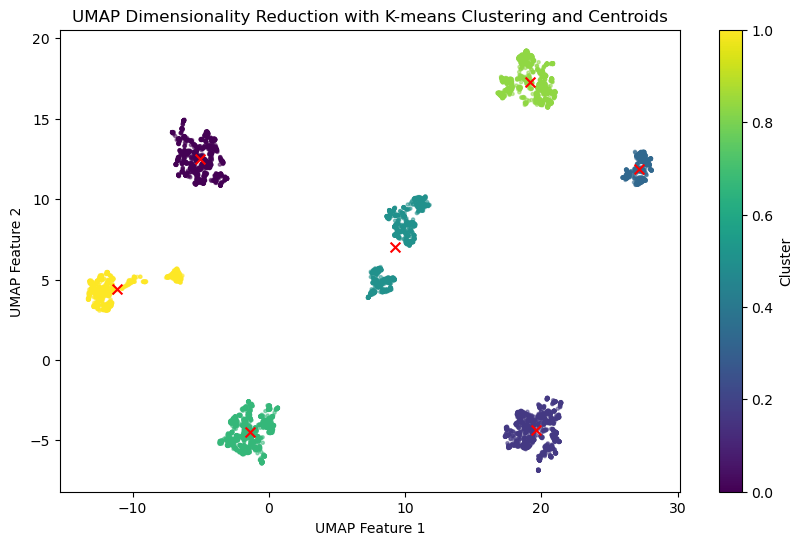

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Assuming demographic_data is your DataFrame containing categorical features
# and clusters column is to be excluded during encoding
categorical_columns = demographic_data.columns.tolist()

# One-hot encode all categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(demographic_data[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Apply UMAP for dimensionality reduction
umap = UMAP(n_components=2, random_state=42)
reduced_data = umap.fit_transform(encoded_categorical_df)
# 假设 reduced_data 是已经降维处理的数据
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)
centroids = kmeans.cluster_centers_

# 添加聚类标签到原始数据
demographic_data['clusters'] = cluster_labels
data['clusters'] = cluster_labels

# 计算并打印轮廓系数
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
print(f'Silhouette Score for K-means with k=7: {silhouette_avg:.4f}')

# 绘制UMAP结果、聚类标签和质心
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', s=5, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='x')  # 以红色'x'标记质心
plt.title('UMAP Dimensionality Reduction with K-means Clustering and Centroids')
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.colorbar(label='Cluster')
plt.show()


In [12]:
# 分割数据集为7个子数据集
clustered_datasets = {}
for i in range(7):
    clustered_datasets[f'Cluster_{i}'] = data[data['clusters'] == i]

# 显示每个子数据集的前几行，验证分割的正确性
for cluster, dataset in clustered_datasets.items():
    print(f"Dataset for {cluster} (first 5 rows):")
    print(dataset.head())
    print("\n")

Dataset for Cluster_0 (first 5 rows):
    File  Row   Q1   Q2   Q3  Q4  FQ1  FQ2  FQ3  ComQ1  ...  Dmed_7  Dmed_8  \
1      1    2  4.0  4.0  4.0   4  3.0  1.0    3    2.0  ...    29.0     150   
7      1    8  3.0  4.0  4.0   4  3.0  2.0    3    2.0  ...    27.0     138   
12     1   13  5.0  5.0  5.0   5  3.0  4.0    3    1.0  ...    29.0     140   
21     1   22  4.0  3.0  4.0   4  2.0  1.0    2    2.0  ...    30.0     169   
25     1   26  4.0  5.0  5.0   3  3.0  2.0    3    2.0  ...    31.0     232   

    DMed_1 DMed_2  DMed_3  DMed_9  Dmed_10  Dmed_5  Dmed_6  clusters  
1      3.0    1.0     8.0     3.0      6.0     1.0     1.0         0  
7      1.0    1.0     4.0     3.0      5.0     1.0     1.0         0  
12     2.0    1.0     4.0     7.0      4.0     1.0     1.0         0  
21     1.0    1.0     6.0     3.0      4.0     1.0     1.0         0  
25     1.0    1.0     3.0     3.0      4.0     1.0     5.0         0  

[5 rows x 124 columns]


Dataset for Cluster_1 (first 5 rows

## Significance Testing

             D1      D2     D3                          D4                 D5  \
clusters                                                                        
0         18-29  Female  White                Some college  $20,000 - $34,999   
1         30-39    Male  White            College graduate  $35,000 - $54,999   
2         30-39    Male  White        High school graduate  Less than $20,000   
3         30-39  Female  White  Grad / professional degree    $90,000 or more   
4         30-39  Female  White            College graduate  $35,000 - $54,999   
5         18-29    Male  White                Some college  Less than $20,000   
6         18-29  Female  White        High school graduate  Less than $20,000   

           D6 Dmed_7       Dmed_8  
clusters                           
0         Yes      1  125-150 lbs  
1         Yes      2     >200 lbs  
2         Yes      2     >200 lbs  
3         Yes      2  150-175 lbs  
4         Yes      1  125-150 lbs  
5         Yes     

C:\Users\howar\AppData\Local\Temp\ipykernel_22704\1040690199.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_counts = mapped_data.groupby(['clusters', feature]).size().unstack(fill_value=0)


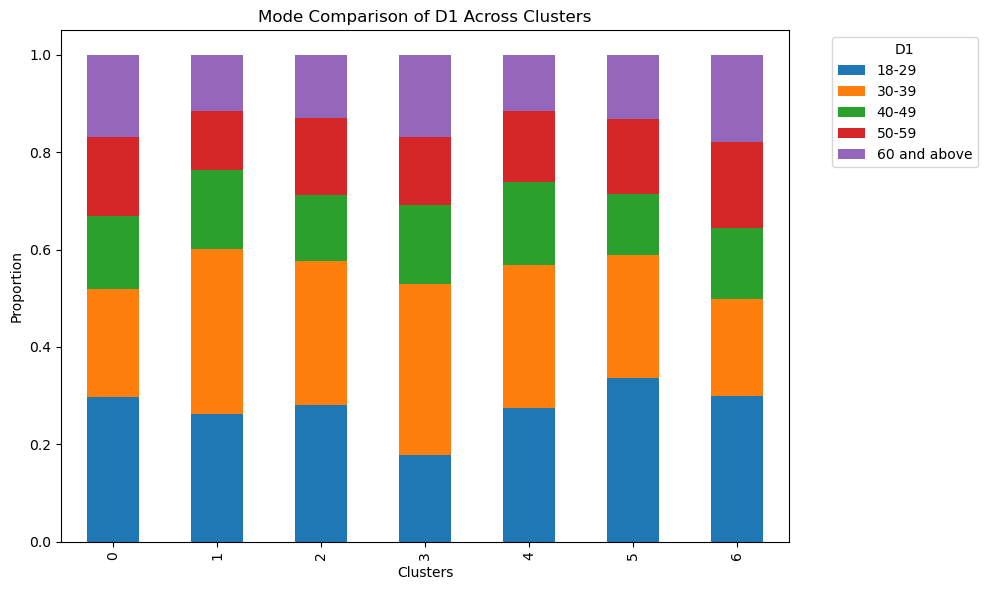

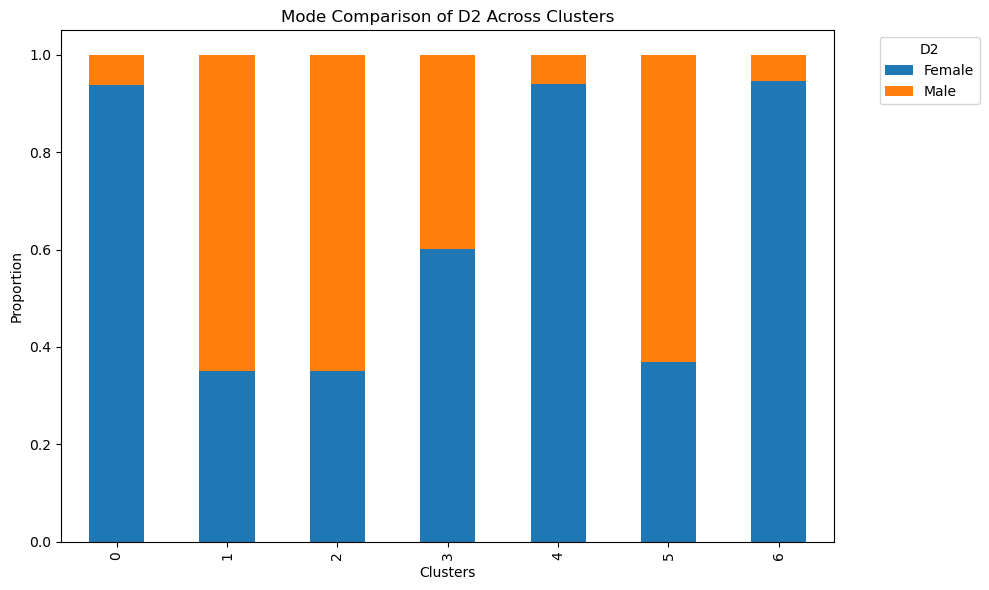

C:\Users\howar\AppData\Local\Temp\ipykernel_22704\1040690199.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_counts = mapped_data.groupby(['clusters', feature]).size().unstack(fill_value=0)


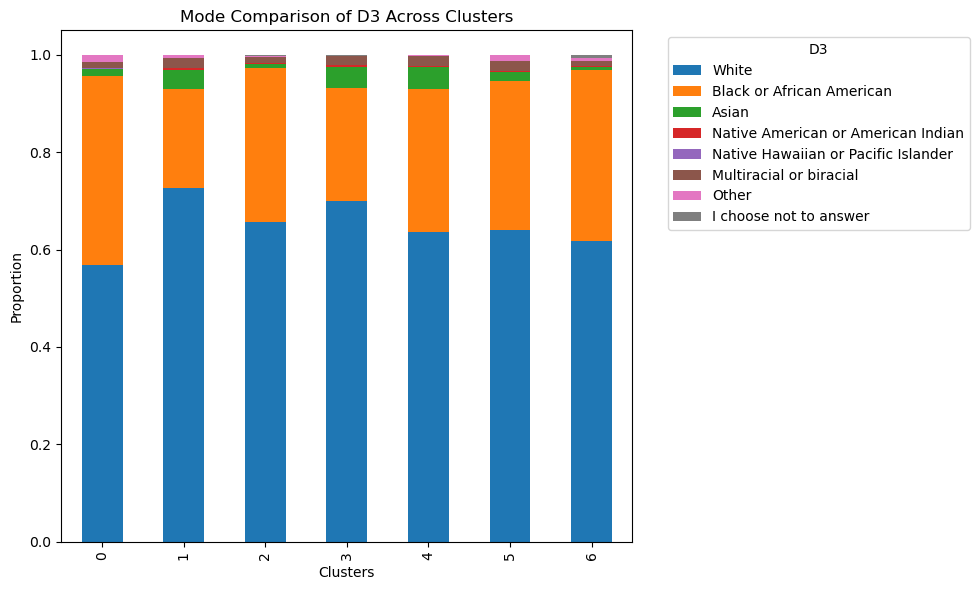

C:\Users\howar\AppData\Local\Temp\ipykernel_22704\1040690199.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_counts = mapped_data.groupby(['clusters', feature]).size().unstack(fill_value=0)


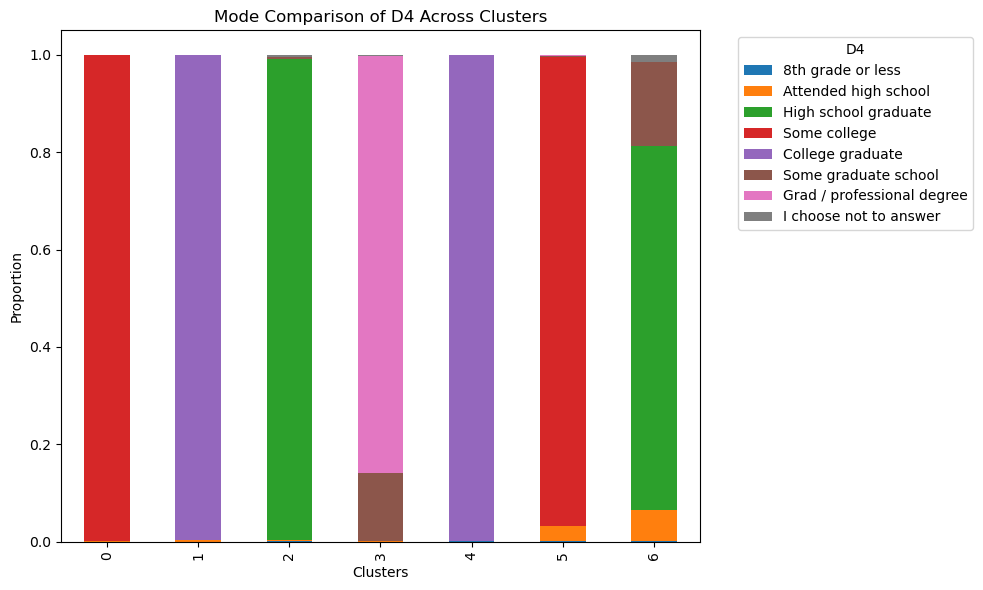

C:\Users\howar\AppData\Local\Temp\ipykernel_22704\1040690199.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_counts = mapped_data.groupby(['clusters', feature]).size().unstack(fill_value=0)


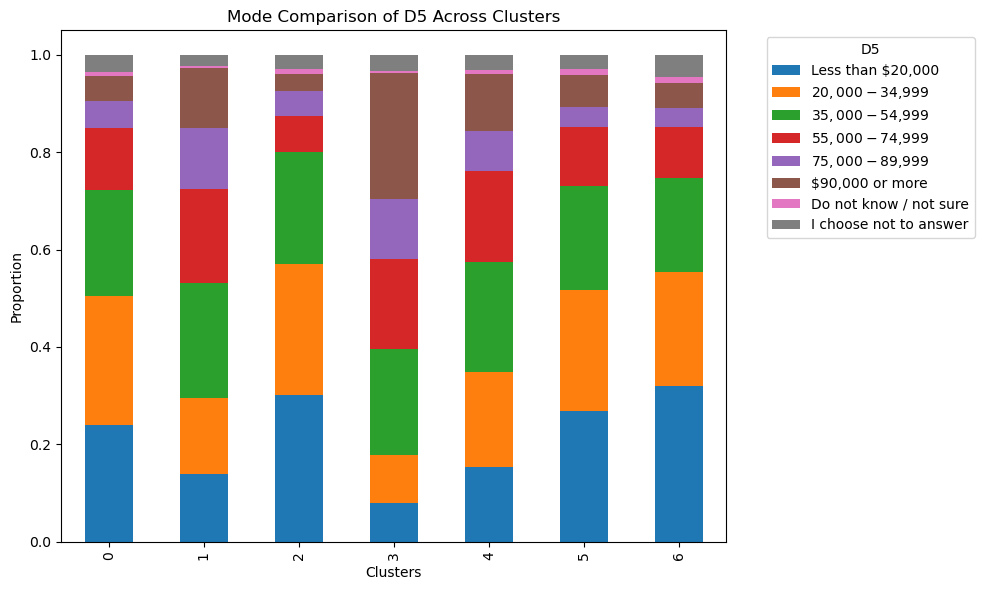

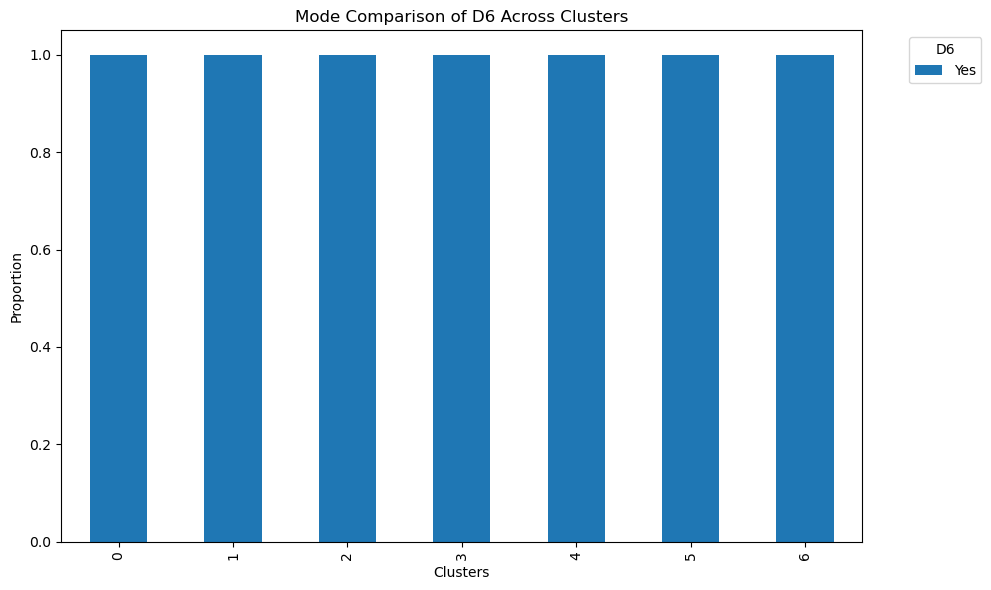

C:\Users\howar\AppData\Local\Temp\ipykernel_22704\1040690199.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_counts = mapped_data.groupby(['clusters', feature]).size().unstack(fill_value=0)


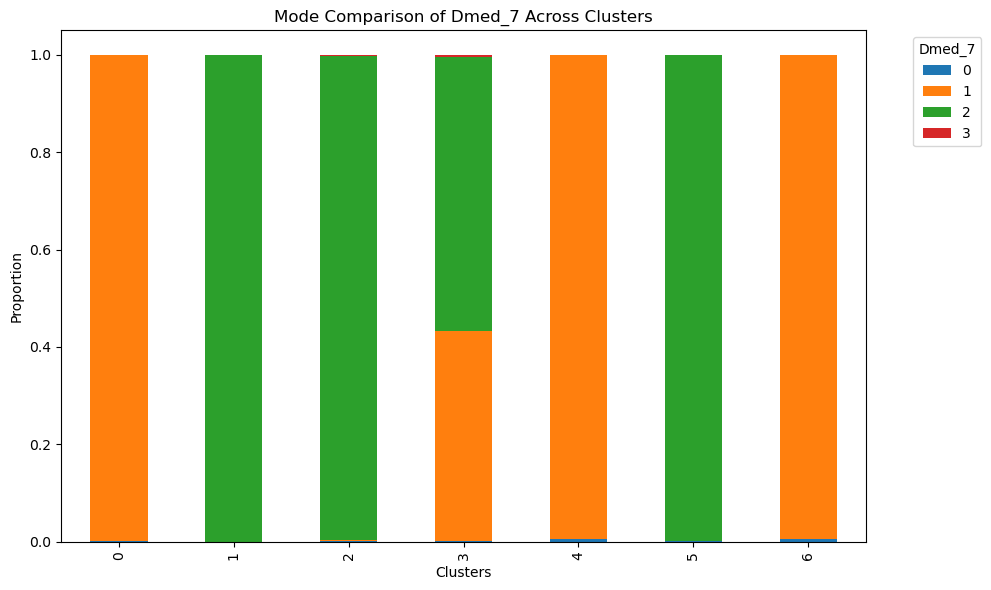

C:\Users\howar\AppData\Local\Temp\ipykernel_22704\1040690199.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_counts = mapped_data.groupby(['clusters', feature]).size().unstack(fill_value=0)


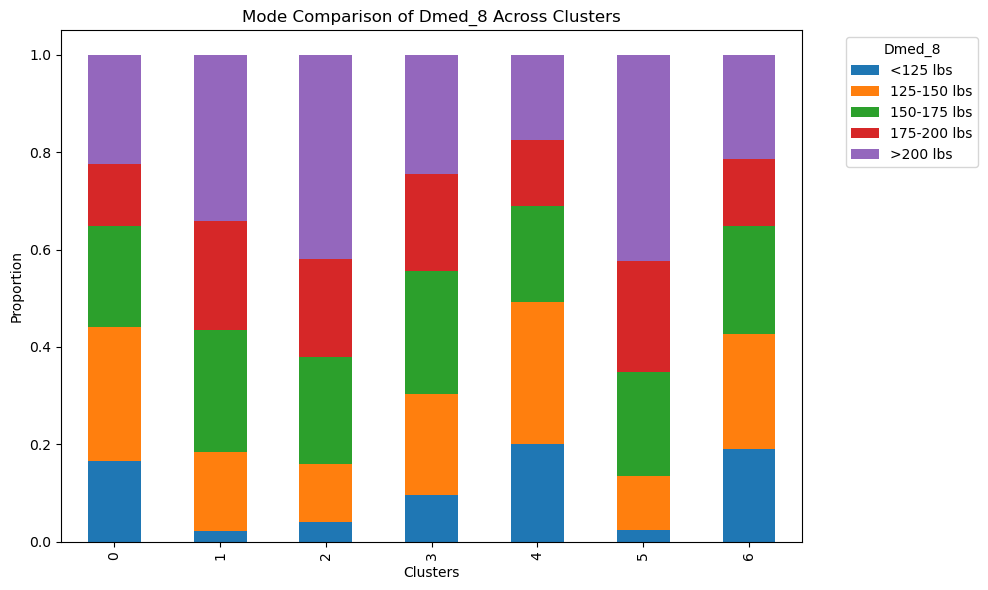

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 定义映射字典
sex_map = {1: 'Male', 2: 'Female'}
race_map = {
    1: 'White', 2: 'Black or African American', 3: 'Asian', 
    4: 'Native American or American Indian', 5: 'Native Hawaiian or Pacific Islander', 
    6: 'Multiracial or biracial', 7: 'Other', 8: 'I choose not to answer'
}
education_map = {
    1: '8th grade or less', 2: 'Attended high school', 3: 'High school graduate',
    4: 'Some college', 5: 'College graduate', 6: 'Some graduate school',
    7: 'Grad / professional degree', 8: 'I choose not to answer'
}
income_map = {
    1: 'Less than $20,000', 2: '$20,000 - $34,999', 3: '$35,000 - $54,999',
    4: '$55,000 - $74,999', 5: '$75,000 - $89,999', 6: '$90,000 or more',
    7: 'Do not know / not sure', 8: 'I choose not to answer'
}
english_first_language_map = {0: 'No', 1: 'Yes'}



# 创建原数据的副本
mapped_data = demographic_data.copy()

# 应用映射到副本数据
mapped_data['D2'] = mapped_data['D2'].map(sex_map)
mapped_data['D3'] = mapped_data['D3'].map(race_map)
mapped_data['D4'] = mapped_data['D4'].map(education_map)
mapped_data['D5'] = mapped_data['D5'].map(income_map)
mapped_data['D6'] = mapped_data['D6'].map(english_first_language_map)

# 提取特征和群集标签
demographic_features = mapped_data.columns.tolist()
clusters = mapped_data['clusters']

# 计算每个群集中类别特征的众数（模式）
categorical_centroids = mapped_data.groupby(clusters).agg(lambda x: x.mode()[0])

# 显示众数表
print(categorical_centroids)

# 可视化每个类别特征在不同群集中的众数比例
for feature in demographic_features:
    if feature == 'clusters':
        continue
    mode_counts = mapped_data.groupby(['clusters', feature]).size().unstack(fill_value=0)
    mode_counts = mode_counts.div(mode_counts.sum(axis=1), axis=0)  # 归一化以进行百分比比较

    mode_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Mode Comparison of {feature} Across Clusters')
    plt.xlabel('Clusters')
    plt.ylabel('Proportion')
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances_argmin_min

# 假设 reduced_data 是UMAP降维后的数据，original_data 是原始数据
# kmeans 是已经在降维数据上训练好的 KMeans 模型
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, reduced_data)

# 假设 original_data 是一个 DataFrame，包含聚类之前的全部原始数据
original_centroids = demographic_data.iloc[closest]

original_centroids['D2'] = original_centroids['D2'].map(sex_map)
original_centroids['D3'] = original_centroids['D3'].map(race_map)
original_centroids['D4'] = original_centroids['D4'].map(education_map)
original_centroids['D5'] = original_centroids['D5'].map(income_map)
original_centroids['D6'] = original_centroids['D6'].map(english_first_language_map)

print("Original data points closest to centroids:")
print(original_centroids)


Original data points closest to centroids:
         D1      D2                         D3                          D4  \
7732  18-29  Female                      White                Some college   
4757  30-39  Female  Black or African American            College graduate   
6236  18-29  Female                      White        High school graduate   
6362  40-49    Male                      White  Grad / professional degree   
2248  18-29  Female                      White            College graduate   
5638  30-39    Male  Black or African American                Some college   
2500  50-59  Female                      White        Attended high school   

                          D5   D6 Dmed_7       Dmed_8  clusters  
7732  I choose not to answer  Yes      1  125-150 lbs         0  
4757       Less than $20,000  Yes      2  125-150 lbs         1  
6236       $20,000 - $34,999  Yes      2  125-150 lbs         2  
6362       $20,000 - $34,999  Yes      2  150-175 lbs         3  
22

C:\Users\howar\AppData\Local\Temp\ipykernel_22704\3038673244.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_centroids['D2'] = original_centroids['D2'].map(sex_map)
C:\Users\howar\AppData\Local\Temp\ipykernel_22704\3038673244.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_centroids['D3'] = original_centroids['D3'].map(race_map)
C:\Users\howar\AppData\Local\Temp\ipykernel_22704\3038673244.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

## 2. Pretrain GPT Model

In [15]:
import os

# 创建文件夹
output_dir = 'Data/clusters/demographic_only'
os.makedirs(output_dir, exist_ok=True)




### GPT4

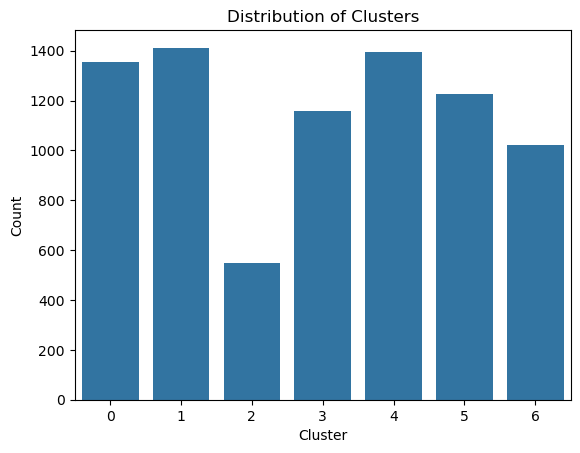

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制条形图
sns.countplot(x='clusters', data=data)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [21]:
# 假设 data 是你的Pandas DataFrame
output_dir_train = 'Data\clusters\demographic_only/train'
output_dir_test = 'Data\clusters\demographic_only/test'

if not os.path.exists(output_dir_train):
    os.makedirs(output_dir_train)

if not os.path.exists(output_dir_test):
    os.makedirs(output_dir_test)

In [22]:
#condition?
def convert_to_prompt(row):
    # Age
    age = f"{18 + int(row['D1']) - 1} years old" if not pd.isna(row['D1']) else "unknown age"
    
    # Sex
    sex = "male" if row['D2'] == 1 else "female" if row['D2'] == 2 else "unknown sex"
    
    # Race
    race_options = [
        "White", "Black or African American", "Asian", 
        "Native American or American Indian", "Native Hawaiian or Pacific Islander", 
        "Multiracial or biracial", "Other", "Prefer not to say"
    ]
    race = race_options[int(row['D3']) - 1] if not pd.isna(row['D3']) else "unknown race"
    
    # Education
    education_options = [
        "8th grade or less", "some high school education", "high school graduate", 
        "some college education", "college graduate", "some graduate school education", 
        "a graduate or professional degree", "prefer not to say"
    ]
    education = education_options[int(row['D4']) - 1] if not pd.isna(row['D4']) else "unknown educational background"
    
    # Income
    income_options = [
        "less than $20,000", "$20,000 - $34,999", "$35,000 - $54,999", 
        "$55,000 - $74,999", "$75,000 - $89,999", "$90,000 or more", 
        "unknown income", "prefer not to say"
    ]
    income = income_options[int(row['D5']) - 1] if not pd.isna(row['D5']) else "unknown income"
    
    # Language
    english_first_lang = "English is their first language" if row['D6'] == 1 else \
                         "English is not their first language" if row['D6'] == 2 else \
                         "it is unknown if English is their first language"
    
    # Physical measurements
    height = f"{row['Dmed_7']} feet tall" if not pd.isna(row['Dmed_7']) else "unknown height"
    weight = f"weighs {row['Dmed_8']} pounds" if not pd.isna(row['Dmed_8']) else "unknown weight"
    
    # Combine all into one prompt
    prompt = (
        f"You are {age}, {sex}, of {race} descent. You have {education} and an annual income of {income}. "
        f"{english_first_lang}. You are {height} and {weight}."
    )
    
    return prompt

Text_Numeracy = "In a few sentences, please describe an experience in your life that demonstrated your knowledge of health or medical issues."
Text_Anxiety = "In a few sentences, please describe what makes you feel most anxious or worried when visiting the doctor's office."
Text_TrustPhys = "In a few sentences, please explain the reasons why you trust or distrust your primary care physician. If you do not have a primary care physician, please answer in regard to doctors in general."
Text_SubjectiveLit = "Regarding all the questions you just answered, to what degree do you feel you have the capacity to obtain, process, and understand basic health information and services needed to make appropriate health decisions? Please explain your answer in a few sentences."




In [23]:

# 分割数据集为7个子数据集并进行训练/测试分割
clustered_datasets = {}
train_datasets = {}
test_datasets = {}

for i in range(best_k):  
    cluster_data = data[data['clusters'] == i].head(100)
    train_data, test_data = train_test_split(cluster_data, test_size=0.2, random_state=42)  # 20% 数据作为测试集
    train_datasets[f'Cluster_{i}'] = train_data
    test_datasets[f'Cluster_{i}'] = test_data


def convert_to_jsonl_format(clustered_datasets, output_dir):
    for cluster, dataset in clustered_datasets.items():
        # Fill missing values
        dataset = dataset.fillna({
            'D1': 0, 'D2': 0, 'D3': 0, 'D4': 0, 'D5': 0, 'D6': 0, 'Dmed_7': 0, 'Dmed_8': 0,
            'Text_SubjectiveLit': 'unknown', 'Text_TrustPhys': 'unknown', 'Text_Anxiety': 'unknown', 'Text_Numeracy': 'unknown'
        })
        
        jsonl_data = []
        for index, row in dataset.iterrows():
            system_prompt = "You should simulate a specified person's persona based on the background information I provided. You are currently visiting a psychologist." + convert_to_prompt(row)
            # Combining the responses into the completion field
            jsonl_data.append({
                "messages": [
                    {"role": "system", "content": system_prompt},
                    {"role": "user", "content": Text_SubjectiveLit},
                    {"role": "assistant", "content": row['Text_SubjectiveLit']},
                    {"role": "user", "content": Text_TrustPhys},
                    {"role": "assistant", "content": row['Text_TrustPhys']},
                    {"role": "user", "content": Text_Anxiety},
                    {"role": "assistant", "content": row['Text_Anxiety']},
                    {"role": "user", "content": Text_Numeracy},
                    {"role": "assistant", "content": row['Text_Numeracy']}
                ]
                })
                
        # Saving the jsonl files
        filename = os.path.join(output_dir, f"{cluster}.jsonl")
        with open(filename, 'w') as f:
            for entry in jsonl_data:
                f.write(json.dumps(entry) + "\n")
        print(f"Saved {filename}")


# 转换训练数据和测试数据为JSON格式并保存
convert_to_jsonl_format(train_datasets, output_dir_train)
convert_to_jsonl_format(test_datasets, output_dir_test)


Saved Data\clusters\demographic_only/train\Cluster_0.jsonl
Saved Data\clusters\demographic_only/train\Cluster_1.jsonl
Saved Data\clusters\demographic_only/train\Cluster_2.jsonl
Saved Data\clusters\demographic_only/train\Cluster_3.jsonl
Saved Data\clusters\demographic_only/train\Cluster_4.jsonl
Saved Data\clusters\demographic_only/train\Cluster_5.jsonl
Saved Data\clusters\demographic_only/train\Cluster_6.jsonl
Saved Data\clusters\demographic_only/test\Cluster_0.jsonl
Saved Data\clusters\demographic_only/test\Cluster_1.jsonl
Saved Data\clusters\demographic_only/test\Cluster_2.jsonl
Saved Data\clusters\demographic_only/test\Cluster_3.jsonl
Saved Data\clusters\demographic_only/test\Cluster_4.jsonl
Saved Data\clusters\demographic_only/test\Cluster_5.jsonl
Saved Data\clusters\demographic_only/test\Cluster_6.jsonl


In [24]:
#modify
data_path = "Data\clusters\demographic_only/train\Cluster_1.jsonl"

# Load the dataset
with open(data_path, 'r', encoding='utf-8') as f:
    dataset = [json.loads(line) for line in f]

# Initial dataset stats
print("Num examples:", len(dataset))
print("First example:")
for message in dataset[0]["messages"]:
    print(message)

Num examples: 80
First example:
{'role': 'system', 'content': "You should simulate a specified person's persona based on the background information I provided. You are currently visiting a psychologist.You are 67 years old, male, of White descent. You have college graduate and an annual income of $75,000 - $89,999. English is their first language. You are 32.0 feet tall and weighs 170 pounds."}
{'role': 'user', 'content': 'Regarding all the questions you just answered, to what degree do you feel you have the capacity to obtain, process, and understand basic health information and services needed to make appropriate health decisions? Please explain your answer in a few sentences.'}
{'role': 'assistant', 'content': 'I feel that I am capable of obtaining, processing and understanding basic health information given to me by a health care provider so I am able to make an informed decision. I generally know what questions I need to ask to get the information I need, and try to give doctors a

In [25]:
# Format error checks
format_errors = defaultdict(int)

for ex in dataset:
    if not isinstance(ex, dict):
        format_errors["data_type"] += 1
        continue
        
    messages = ex.get("messages", None)
    if not messages:
        format_errors["missing_messages_list"] += 1
        continue
        
    for message in messages:
        if "role" not in message or "content" not in message:
            format_errors["message_missing_key"] += 1
        
        if any(k not in ("role", "content", "name", "function_call", "weight") for k in message):
            format_errors["message_unrecognized_key"] += 1
        
        if message.get("role", None) not in ("system", "user", "assistant", "function"):
            format_errors["unrecognized_role"] += 1
            
        content = message.get("content", None)
        function_call = message.get("function_call", None)
        
        if (not content and not function_call) or not isinstance(content, str):
            format_errors["missing_content"] += 1
    
    if not any(message.get("role", None) == "assistant" for message in messages):
        format_errors["example_missing_assistant_message"] += 1

if format_errors:
    print("Found errors:")
    for k, v in format_errors.items():
        print(f"{k}: {v}")
else:
    print("No errors found")

No errors found


## 4. Testing results

In [5]:
models = ["ft:gpt-4o-mini-2024-07-18:personal:demo-0:9rWKwYry",
          "ft:gpt-4o-mini-2024-07-18:personal:demo-1:9rWLgata",
            "ft:gpt-4o-mini-2024-07-18:personal:demo-2:9rWLNREH",
            "ft:gpt-4o-mini-2024-07-18:personal:demo-3:9rWXLdXx",
            "ft:gpt-4o-mini-2024-07-18:personal:demo-4:9rWXJ7nT",
            "ft:gpt-4o-mini-2024-07-18:personal:demo-5:9rWXR9QB",
            "ft:gpt-4o-mini-2024-07-18:personal:demo-6:9rWjYhIW",
            "gpt-3.5-turbo-0125"
            ]


Text_Numeracy = "In a few sentences, please describe an experience in your life that demonstrated your knowledge of health or medical issues."
Text_Anxiety = "In a few sentences, please describe what makes you feel most anxious or worried when visiting the doctor's office."
Text_TrustPhys = "In a few sentences, please explain the reasons why you trust or distrust your primary care physician. If you do not have a primary care physician, please answer in regard to doctors in general."
Text_SubjectiveLit = "Regarding all the questions you just answered, to what degree do you feel you have the capacity to obtain, process, and understand basic health information and services needed to make appropriate health decisions? Please explain your answer in a few sentences."


user_prompt = {"Text_Numeracy": Text_Numeracy, 
               "Text_Anxiety": Text_Anxiety, 
               "Text_TrustPhys": Text_TrustPhys, 
               "Text_SubjectiveLit": Text_SubjectiveLit}

In [27]:
from openai import OpenAI
import json
from collections import defaultdict

client = OpenAI()

#response from a single person (i = which model, j = resp from jth question)
def perfromace_across_models(models, system_prompt, user_prompt):
  response_list = defaultdict(lambda: {prompt: [] for prompt in user_prompt})
  for i, model in enumerate(models):
    for j in user_prompt:
      response = client.chat.completions.create(
        model= model,
        messages=[{"role": "system", "content": system_prompt}, 
                  {"role": "user", "content": user_prompt[j]}],
        temperature=1,
        max_tokens=256,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
      ).choices[0].message.content
      response_list[i][j].append(response)
  
  return response_list


def dict_to_regular(d):
    if isinstance(d, defaultdict):
        d = {k: dict_to_regular(v) for k, v in d.items()}
    return d



In [29]:
# Path to the uploaded file
file_paths = [f'Data\clusters\demographic_only/test\Cluster_{i}.jsonl' for i in range(best_k)]

# Reading the JSONL file and converting it to a list of dictionaries
datas = []

for file_path in file_paths:
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    datas.append(data)

In [33]:
#j = jth cluster
for j, data in enumerate(datas):
    all_responses = []
    all_labels = []

    for i in range(len(data)):
        labels =  {prompt: "" for prompt in user_prompt}
        system_prompt = data[i]["messages"][0]["content"] #peronal information
        q1 = data[i]["messages"][2]["content"]  #answer for q1
        q2 = data[i]["messages"][4]["content"]
        q3 = data[i]["messages"][6]["content"]
        q4 = data[i]["messages"][8]["content"]

        user_response = perfromace_across_models(models, system_prompt, user_prompt)
        #user_response[i][j] = ith model's jth question's  response 
        labels['Text_Numeracy'] = q1
        labels['Text_Anxiety'] = q2
        labels['Text_TrustPhys'] = q3
        labels['Text_SubjectiveLit'] = q4
        
        all_responses.append(user_response)
        all_labels.append(labels)

    all_responses_output_dir = f"results/cluster_{j}/all_responses_demo_only.json"
    all_labels_output_dir = f"results/cluster_{j}/all_labels_demo_only.json"

    os.makedirs(os.path.dirname(all_responses_output_dir), exist_ok=True)
    os.makedirs(os.path.dirname(all_labels_output_dir), exist_ok=True)

    # 将 all_responses 中的 defaultdict 转换为普通字典
    all_responses_regular = [dict_to_regular(d) for d in all_responses]

    # 序列化为 JSON 并保存到文件
    with open(all_responses_output_dir, 'w') as f:
        json.dump(all_responses_regular, f)

    with open(all_labels_output_dir, 'w') as f:
        json.dump(all_labels, f)


## Evaluation methods

In [7]:
all_responses = []
all_labels = []

#all_response[clust][i][j][k] = [nth clust][ith person][jth model][kth question]
#all_labels[clust][i][k] = [nth clust][ith person][kth question]

# 从文件中读取并反序列化 JSON 的函数
def regular_to_defaultdict(d):
    if isinstance(d, dict):
        return defaultdict(lambda: {prompt: [] for prompt in user_prompt},
                           {k: regular_to_defaultdict(v) for k, v in d.items()})
    return d

for i in range(best_k):
    # 从文件中读取 JSON 数据并转换回 defaultdict
    with open(f'results/cluster_{i}/all_responses_demo_only.json', 'r') as f:
        all_responses_loaded = json.load(f)

    with open(f'results/cluster_{i}/all_labels_demo_only.json', 'r') as f:
        all_labels_loaded = json.load(f)

    all_responses.append([regular_to_defaultdict(d) for d in all_responses_loaded])
    all_labels.append([d for d in all_labels_loaded])

### 1. Text Similarity

In [10]:
from transformers import BertModel, BertTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(paragraph1, paragraph2):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Tokenize and prepare the inputs
    inputs1 = tokenizer(paragraph1, return_tensors='pt', padding=True, truncation=True, max_length=512)
    inputs2 = tokenizer(paragraph2, return_tensors='pt', padding=True, truncation=True, max_length=512)

    # Encode the paragraphs using the BERT model
    with torch.no_grad():
        outputs1 = model(**inputs1)
        outputs2 = model(**inputs2)

    # Use mean pooling to get sentence embeddings
    embeddings1 = outputs1.last_hidden_state.mean(dim=1).numpy()
    embeddings2 = outputs2.last_hidden_state.mean(dim=1).numpy()

    # Calculate cosine similarity
    similarity = cosine_similarity(embeddings1, embeddings2)
    return similarity


all_similarities_cosine = {f"cluster_{j}" : [] for j in range(best_k)}

for clust in range(len(all_labels)):
    similarities = []
    for i, person in enumerate(all_labels[clust]):
        label = [person["Text_Numeracy"], person["Text_Anxiety"], person["Text_TrustPhys"], person["Text_SubjectiveLit"]]
        
        answer_models = [
            [all_responses[clust][i][str(model_idx)]["Text_Numeracy"],
             all_responses[clust][i][str(model_idx)]["Text_Anxiety"],
             all_responses[clust][i][str(model_idx)]["Text_TrustPhys"],
             all_responses[clust][i][str(model_idx)]["Text_SubjectiveLit"]]
            for model_idx in range(len(models))
        ]

        scores = [[] for _ in range(len(models))]  # 存放5个模型的分数

        for j in range(len(label)):
            for model_idx in range(len(models)):
                scores[model_idx].append(calculate_similarity(label[j], answer_models[model_idx][j]))

        similarities.append(scores)  # 包含所有模型的分数
    all_similarities_cosine[f"cluster_{clust}"] = similarities

In [ ]:
''' 
structure of all_similarities
{
    "cluster_0": [
        # Person 0 in cluster_0
        [
            [similarity_Numeracy_model0, similarity_Anxiety_model0, similarity_TrustPhys_model0, similarity_SubjectiveLit_model0],  # model 0 scores
            [similarity_Numeracy_model1, similarity_Anxiety_model1, similarity_TrustPhys_model1, similarity_SubjectiveLit_model1],  # model 1 scores
            [similarity_Numeracy_model2, similarity_Anxiety_model2, similarity_TrustPhys_model2, similarity_SubjectiveLit_model2],  # model 2 scores
            [similarity_Numeracy_model3, similarity_Anxiety_model3, similarity_TrustPhys_model3, similarity_SubjectiveLit_model3],  # model 3 scores
            [similarity_Numeracy_regular, similarity_Anxiety_regular, similarity_TrustPhys_regular, similarity_SubjectiveLit_regular]  # regular model scores
        ],
        # Person 1 in cluster_0
        [
            [similarity_Numeracy_model0, similarity_Anxiety_model0, similarity_TrustPhys_model0, similarity_SubjectiveLit_model0],
            [similarity_Numeracy_model1, similarity_Anxiety_model1, similarity_TrustPhys_model1, similarity_SubjectiveLit_model1],
            [similarity_Numeracy_model2, similarity_Anxiety_model2, similarity_TrustPhys_model2, similarity_SubjectiveLit_model2],
            [similarity_Numeracy_model3, similarity_Anxiety_model3, similarity_TrustPhys_model3, similarity_SubjectiveLit_model3],
            [similarity_Numeracy_regular, similarity_Anxiety_regular, similarity_TrustPhys_regular, similarity_SubjectiveLit_regular]
        ],
        # More people in cluster_0
    ],
    "cluster_1": [
        # Similar structure as cluster_0
    ],
    # More clusters
}

'''

In [11]:
best_models = {}
all_scores = {}

for clust, sim_list in all_similarities_cosine.items():
    cluster_similarities = np.array(sim_list)
    
    # Calculate the mean similarity for each model across all fields for each person
    mean_similarities_per_person = np.mean(cluster_similarities, axis=2)
    
    # Calculate the average similarity for each model across all people
    average_model_similarities = np.mean(mean_similarities_per_person, axis=0)
    
    best_model_idx = np.argmax(average_model_similarities)
    best_models[clust] = best_model_idx
    all_scores[clust] = average_model_similarities

    print(f"Cluster {clust}, Model scores: {average_model_similarities}")
    print(f"Cluster {clust}, Best model: model{best_model_idx} with average similarity: {average_model_similarities[best_model_idx]}")

# Print the best models for all clusters
print("Best models for all clusters:", best_models)


Cluster cluster_0, Model scores: [[[0.7409924 ]]

 [[0.73787284]]

 [[0.74692583]]

 [[0.7461528 ]]

 [[0.7299795 ]]

 [[0.7384705 ]]

 [[0.74348885]]

 [[0.7421519 ]]]
Cluster cluster_0, Best model: model2 with average similarity: [[0.74692583]]
Cluster cluster_1, Model scores: [[[0.7383011 ]]

 [[0.7408611 ]]

 [[0.733384  ]]

 [[0.74107873]]

 [[0.7318999 ]]

 [[0.73304284]]

 [[0.73789704]]

 [[0.7410923 ]]]
Cluster cluster_1, Best model: model7 with average similarity: [[0.7410923]]
Cluster cluster_2, Model scores: [[[0.7290157 ]]

 [[0.73061776]]

 [[0.73799473]]

 [[0.7402944 ]]

 [[0.7208138 ]]

 [[0.7354644 ]]

 [[0.73602545]]

 [[0.72982055]]]
Cluster cluster_2, Best model: model3 with average similarity: [[0.7402944]]
Cluster cluster_3, Model scores: [[[0.7482031 ]]

 [[0.7513962 ]]

 [[0.76192284]]

 [[0.75510806]]

 [[0.7448902 ]]

 [[0.75430596]]

 [[0.7608839 ]]

 [[0.75278693]]]
Cluster cluster_3, Best model: model2 with average similarity: [[0.76192284]]
Cluster cluste

### 2. LLM as judge? comparing responses between label & different models

Dimensions：
1. similarity on decision
2. similarity on personality
3. hallucination
4. stability


In [3]:
judger = OpenAI()
system_judger_prompt = "You are a professional psychologist with extensive experience in evaluating textual responses for various psychological and cognitive dimensions. "

def get_response(judger, message):
    response = judger.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": system_judger_prompt},
            {"role": "user", "content": message}
        ]
    )
    return response.choices[0].message.content

def extract_numeric_score(response_text):
    match = re.search(r"(\d+(\.\d+)?)", response_text)
    if match:
        return float(match.group(1))
    else:
        return 0.0
    
def calculate_similarity_llm(label, answer):
    dimensions = ["similarity on decision", "similarity on personality", "hallucination", "stability"]
    scores = []
    for dimension in dimensions:
        message = f"Evaluate the following model response based on the dimension of '{dimension}' comparing to the label response:\n\nLabel response: {label}\nModel response: {answer}\n\nScore (1-10). Please only output the number."
        score_text = get_response(judger, message)
        score = extract_numeric_score(score_text)
        scores.append(score)
    return sum(scores) / len(scores)

In [4]:
all_similarities = {f"cluster_{j}" : [] for j in range(best_k)}

for clust in range(len(all_labels)):
    similarities = []
    for i, person in enumerate(all_labels[clust]):
        label = [person["Text_Numeracy"], person["Text_Anxiety"], person["Text_TrustPhys"], person["Text_SubjectiveLit"]]
        
        answer_models = [
            [all_responses[clust][i][str(model_idx)]["Text_Numeracy"],
             all_responses[clust][i][str(model_idx)]["Text_Anxiety"],
             all_responses[clust][i][str(model_idx)]["Text_TrustPhys"],
             all_responses[clust][i][str(model_idx)]["Text_SubjectiveLit"]]
            for model_idx in range(5)
        ]

        scores = [[] for _ in range(5)]  # 存放5个模型的分数

        for j in range(len(label)):
            for model_idx in range(5):
                scores[model_idx].append(calculate_similarity_llm(label[j], answer_models[model_idx][j]))

        similarities.append(scores)  # 包含所有模型的分数
    all_similarities[f"cluster_{clust}"] = similarities


In [5]:
best_models = {}
all_scores = {}

for clust, sim_list in all_similarities.items():
    cluster_similarities = np.array(sim_list)
    
    # Calculate the mean similarity for each model across all fields for each person
    mean_similarities_per_person = np.mean(cluster_similarities, axis=2)
    
    # Calculate the average similarity for each model across all people
    average_model_similarities = np.mean(mean_similarities_per_person, axis=0)
    
    best_model_idx = np.argmax(average_model_similarities)
    best_models[clust] = best_model_idx
    all_scores[clust] = average_model_similarities

    print(f"Cluster {clust}, Model scores: {average_model_similarities}")
    print(f"Cluster {clust}, Best model: model{best_model_idx} with average similarity: {average_model_similarities[best_model_idx]}")

# Print the best models for all clusters
print("Best models for all clusters:", best_models)


Cluster cluster_0, Model scores: [2.4125   2.546875 2.45     2.603125 3.3     ]
Cluster cluster_0, Best model: model4 with average similarity: 3.3
Cluster cluster_1, Model scores: [2.7625    2.69375   2.509375  2.8359375 3.1921875]
Cluster cluster_1, Best model: model4 with average similarity: 3.1921875
Cluster cluster_2, Model scores: [2.740625  2.8       2.609375  2.75      3.5203125]
Cluster cluster_2, Best model: model4 with average similarity: 3.5203125
Cluster cluster_3, Model scores: [2.83125  2.678125 2.80625  2.75625  3.5     ]
Cluster cluster_3, Best model: model4 with average similarity: 3.5
Best models for all clusters: {'cluster_0': 4, 'cluster_1': 4, 'cluster_2': 4, 'cluster_3': 4}
